# Data Importing

In [53]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report, roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


In [32]:
df = pd.read_csv(r"C:/Users/poula/Downloads/10- heart_failure_clinical_records_dataset(project 6).csv")

In [33]:
df.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [34]:
# Getting Additiona Information of the Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [35]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


In [36]:
# Check for unique values
df.nunique()

age                          47
anaemia                       2
creatinine_phosphokinase    208
diabetes                      2
ejection_fraction            17
high_blood_pressure           2
platelets                   176
serum_creatinine             40
serum_sodium                 27
sex                           2
smoking                       2
time                        148
DEATH_EVENT                   2
dtype: int64

In [37]:
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [38]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


# outlier

<Axes: >

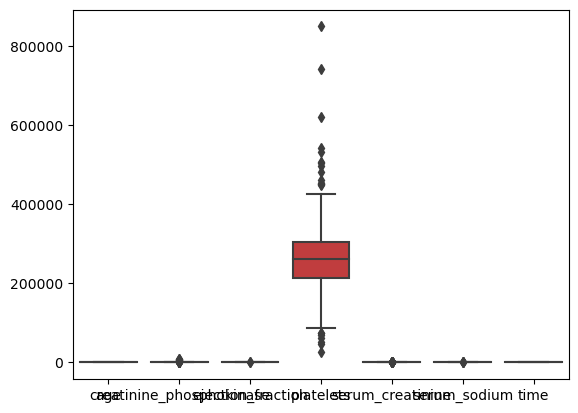

In [39]:
sns.boxplot(data=df[["age", "creatinine_phosphokinase", "ejection_fraction", "platelets", "serum_creatinine", "serum_sodium", "time"]])

In [40]:
# Handle outliers using Interquartile Range (IQR) method
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

In [41]:
df = remove_outliers(df, ["age", "creatinine_phosphokinase", "ejection_fraction", "platelets", "serum_creatinine", "serum_sodium", "time"])

In [42]:
# Split data into features and target (after outlier handling)
X = df.drop(columns=["DEATH_EVENT"])
y = df["DEATH_EVENT"]

In [43]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [45]:
# Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [46]:
# Predictions for Train and Test sets
y_train_pred_dt = decision_tree.predict(X_train)
y_test_pred_dt = decision_tree.predict(X_test)

In [47]:
# Model performance metrics for Train data (Decision Tree)
print("Decision Tree - Train Data Metrics:")
print(f"Accuracy: {accuracy_score(y_train, y_train_pred_dt)}")
print(f"Precision: {precision_score(y_train, y_train_pred_dt)}")
print(f"Recall: {recall_score(y_train, y_train_pred_dt)}")
print(f"F1 Score: {f1_score(y_train, y_train_pred_dt)}")
print("Confusion Matrix:")
print(confusion_matrix(y_train, y_train_pred_dt))
print("Classification Report:")
print(classification_report(y_train, y_train_pred_dt))


Decision Tree - Train Data Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
[[111   0]
 [  0  45]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       111
           1       1.00      1.00      1.00        45

    accuracy                           1.00       156
   macro avg       1.00      1.00      1.00       156
weighted avg       1.00      1.00      1.00       156



In [48]:
# Model performance metrics for Test data (Decision Tree)
print("\nDecision Tree - Test Data Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred_dt)}")
print(f"Precision: {precision_score(y_test, y_test_pred_dt)}")
print(f"Recall: {recall_score(y_test, y_test_pred_dt)}")
print(f"F1 Score: {f1_score(y_test, y_test_pred_dt)}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred_dt))
print("Classification Report:")
print(classification_report(y_test, y_test_pred_dt))


Decision Tree - Test Data Metrics:
Accuracy: 0.7647058823529411
Precision: 0.5
Recall: 0.5
F1 Score: 0.5
Confusion Matrix:
[[44  8]
 [ 8  8]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85        52
           1       0.50      0.50      0.50        16

    accuracy                           0.76        68
   macro avg       0.67      0.67      0.67        68
weighted avg       0.76      0.76      0.76        68



In [49]:
# ROC Curve for Test Data (Decision Tree)
y_test_prob_dt = decision_tree.predict_proba(X_test)[:, 1]  # Predicted probabilities for the positive class (DEATH_EVENT=1)
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_test_prob_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

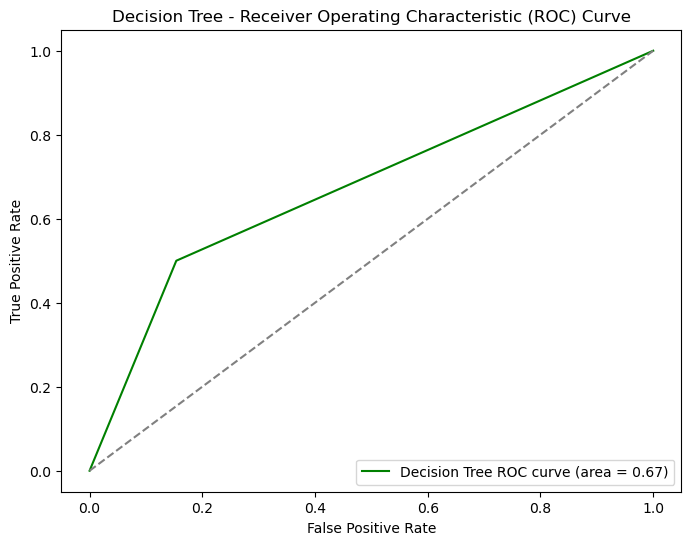

In [50]:
# Plot the ROC curve for Decision Tree
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, color='green', label=f'Decision Tree ROC curve (area = {roc_auc_dt:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree - Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [51]:
# Visualizing the Decision Tree

plt.figure(figsize=(15, 10))
tree.plot_tree(decision_tree, feature_names=X.columns, class_names=["No Death", "Death"], filled=True)
plt.title("Decision Tree Visualization")
plt.show()

InvalidParameterError: The 'feature_names' parameter of plot_tree must be an instance of 'list' or None. Got Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time'],
      dtype='object') instead.

<Figure size 1500x1000 with 0 Axes>